In [1]:
import praw
import pandas as pd
import time

# Reddit API Authentication
reddit = praw.Reddit(
    client_id='BhSCiVh5stJoV4mGTJNuAQ',
    client_secret='vUolg2pw4eI3QZlSenQ4PBbwzCjupw',
    user_agent='onquest-analysis'
)

# List of target subreddits
subreddits = [
    'solotravel', 'travel', 'asktravel', 'travelhacks', 'backpacking', 'digitalnomad',
    'IndiaTravel', 'Nomad', 'Shoestring', 'FrugalTravel', 'Flights',
    'TravelNoPics', 'vlogcreations'
]

# Container for all posts
all_posts = []

# Loop through each subreddit
for sub in subreddits:
    print(f"Scraping: r/{sub}")
    subreddit = reddit.subreddit(sub)
    try:
        for post in subreddit.hot(limit=1000):
            all_posts.append({
                'subreddit': sub,
                'title': post.title,
                'body': post.selftext,
                'upvotes': post.score,
                'comments': post.num_comments,
                'created': post.created_utc,
                'id': post.id,
                'url': post.url,
                'author': str(post.author)
            })
        # Optional: Pause to respect rate limits
        time.sleep(1)
    except Exception as e:
        print(f"Error with r/{sub}: {e}")
        continue

# Convert to DataFrame
df = pd.DataFrame(all_posts)

# Preview
print(df.head())
print(f"\nTotal posts collected: {len(df)}")

Scraping: r/solotravel
Scraping: r/travel
Scraping: r/asktravel
Scraping: r/travelhacks
Scraping: r/backpacking
Scraping: r/digitalnomad
Scraping: r/IndiaTravel
Scraping: r/Nomad
Scraping: r/Shoestring
Scraping: r/FrugalTravel
Scraping: r/Flights
Scraping: r/TravelNoPics
Scraping: r/vlogcreations
    subreddit                                              title  \
0  solotravel  /r/solotravel "The Weekly Common Room" - Gener...   
1  solotravel                 Weekly Destination Thread - Dublin   
2  solotravel  Do you ever feel a weird sadness right after a...   
3  solotravel  that weird little moment when solo travel make...   
4  solotravel  solo travel tips (activities, hacks, avoiding ...   

                                                body  upvotes  comments  \
0  This thread is for you to do things like\n\n* ...        0        11   
1  Welcome back to our weekly destination thread ...        8        13   
2  Just got back from a month of solo travel and ...       52       

In [2]:
# Combine title + body
df['text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

# Basic text cleaning
import re

def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", str(text))  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only letters
    return text.lower()

df['cleaned_text'] = df['text'].apply(clean_text)

In [3]:
df.head(2)

,subreddit,title,body,upvotes,comments,created,id,url,author,text,cleaned_text
0,solotravel,"/r/solotravel ""The Weekly Common Room"" - Gener...",This thread is for you to do things like\n\n* ...,0,11,1.749424e+09,1l6pgfj,https://www.reddit.com/r/solotravel/comments/1...,AutoModerator,"/r/solotravel ""The Weekly Common Room"" - Gener...",rsolotravel the weekly common room general ch...
1,solotravel,Weekly Destination Thread - Dublin,Welcome back to our weekly destination thread ...,8,13,1.749162e+09,1l4cg1j,https://www.reddit.com/r/solotravel/comments/1...,WalkingEars,Weekly Destination Thread - Dublin Welcome bac...,weekly destination thread dublin welcome back...


In [10]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\91824\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91824\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
# Labels and their descriptions (you can modify for better matching)
labels = {
    "Frequent Traveler": "Someone who travels every week or very often",
    "Seasonal Traveler": "Someone who travels occasionally or during holidays",
    "One-time Traveler": "Someone who has traveled only once or very rarely"
}

label_texts = list(labels.values())
label_names = list(labels.keys())

# Precompute label embeddings
label_embeddings = model.encode(label_texts, convert_to_tensor=True)

In [12]:
def classify_travel_frequency(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, label_embeddings)
    
    best_match_idx = cosine_scores.argmax()
    return label_names[best_match_idx]

In [13]:
df['travel_frequency'] = df['cleaned_text'].apply(classify_travel_frequency)

In [14]:
df.head(2)

,subreddit,title,body,upvotes,comments,created,id,url,author,text,...,num_keywords_found,has_first,has_every,has_monthly,has_frequently,has_often,has_regularly,has_once,has_only,travel_frequency
0,solotravel,"/r/solotravel ""The Weekly Common Room"" - Gener...",This thread is for you to do things like\n\n* ...,0,11,1.749424e+09,1l6pgfj,https://www.reddit.com/r/solotravel/comments/1...,AutoModerator,"/r/solotravel ""The Weekly Common Room"" - Gener...",...,1,0,0,0,0,0,0,0,0,Frequent Traveler
1,solotravel,Weekly Destination Thread - Dublin,Welcome back to our weekly destination thread ...,8,13,1.749162e+09,1l4cg1j,https://www.reddit.com/r/solotravel/comments/1...,WalkingEars,Weekly Destination Thread - Dublin Welcome bac...,...,0,0,0,0,0,0,0,0,0,Seasonal Traveler


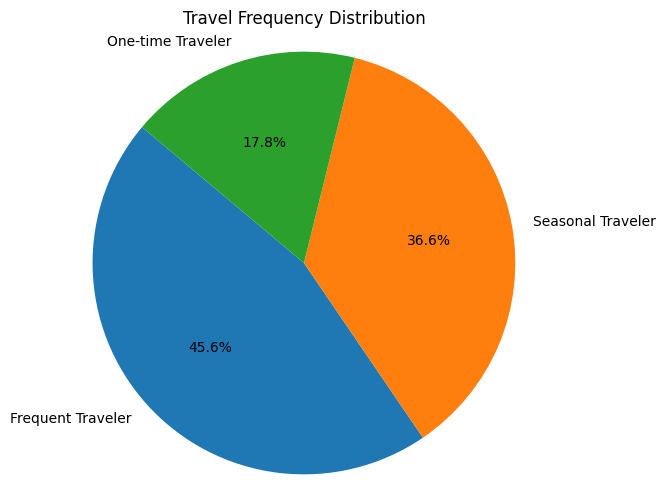

In [15]:
import matplotlib.pyplot as plt

# Count occurrences of each category
frequency_counts = df['travel_frequency'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Frequency Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
travel_styles = {
    "Solo": "Traveling alone, independently",
    "Group": "Traveling with a group of friends or strangers",
    "Family": "Traveling with parents, children, or other family members",
    "Couple": "Traveling with a partner or significant other"
}

style_texts = list(travel_styles.values())
style_labels = list(travel_styles.keys())

In [17]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
style_embeddings = model.encode(style_texts, convert_to_tensor=True)

In [18]:
def classify_travel_style(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, style_embeddings)
    best_match_idx = cosine_scores.argmax()
    return style_labels[best_match_idx]

In [19]:
df['travel_style'] = df['cleaned_text'].apply(classify_travel_style)

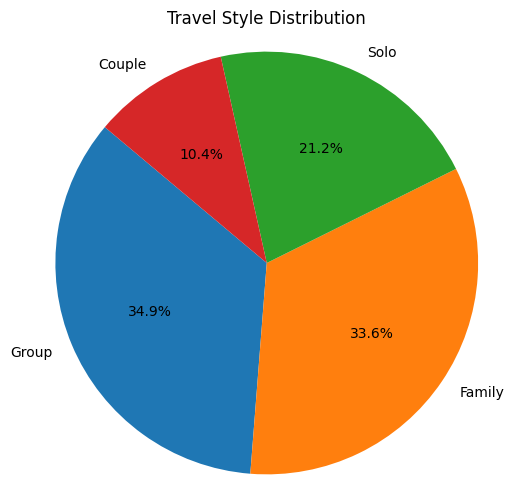

In [20]:
import matplotlib.pyplot as plt

style_counts = df['travel_style'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Style Distribution')
plt.axis('equal')
plt.show()

In [21]:
budget_categories = {
    "Luxury": "Staying in 5-star hotels, flying business class, fine dining, expensive experiences",
    "Mid-range": "Staying in decent hotels, flying economy, eating at nice restaurants but within a budget",
    "Shoestring": "Backpacking, hostels, street food, budget airlines, low-cost travel"
}

budget_texts = list(budget_categories.values())
budget_labels = list(budget_categories.keys())

In [22]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
budget_embeddings = model.encode(budget_texts, convert_to_tensor=True)

In [23]:
def classify_travel_budget(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, budget_embeddings)
    best_match_idx = cosine_scores.argmax()
    return budget_labels[best_match_idx]

In [24]:
df['travel_budget'] = df['cleaned_text'].apply(classify_travel_budget)

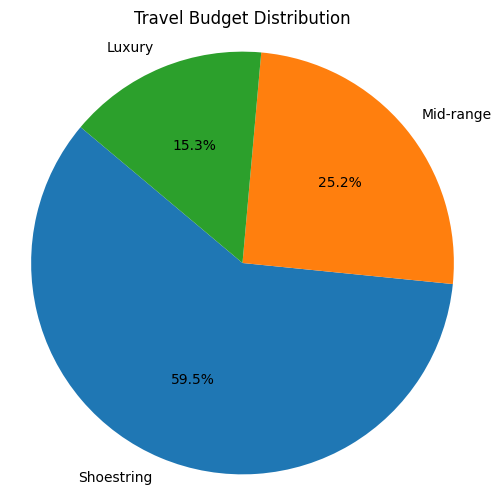

In [25]:
budget_counts = df['travel_budget'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(budget_counts, labels=budget_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Budget Distribution')
plt.axis('equal')
plt.show()

In [26]:
trip_purposes = {
    "Work": "Traveling for business meetings, conferences, or company assignments",
    "Leisure": "Traveling for fun, sightseeing, or relaxing vacations",
    "Wellness": "Traveling for physical or mental wellness like yoga, spa retreats, or health improvement",
    "Adventure": "Traveling for thrilling activities like trekking, hiking, scuba diving, or extreme sports"
}

purpose_texts = list(trip_purposes.values())
purpose_labels = list(trip_purposes.keys())

In [27]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
purpose_embeddings = model.encode(purpose_texts, convert_to_tensor=True)

In [28]:
def classify_trip_purpose(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, purpose_embeddings)
    best_match_idx = cosine_scores.argmax()
    return purpose_labels[best_match_idx]

In [29]:
df['trip_purpose'] = df['cleaned_text'].apply(classify_trip_purpose)

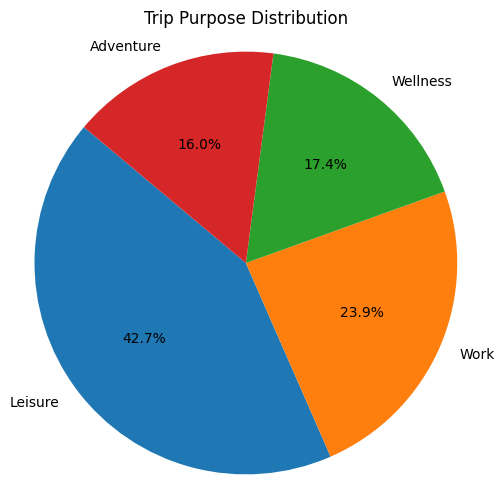

In [30]:
purpose_counts = df['trip_purpose'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Trip Purpose Distribution')
plt.axis('equal')
plt.show()

In [31]:
digital_behaviors = {
    "Content Creators": "People who frequently post content like videos, blogs, photos, or travel guides online",
    "Info Seekers": "People who search for and read travel content online to plan their trips",
    "Lurkers": "People who browse content passively without posting or interacting much"
}

behavior_texts = list(digital_behaviors.values())
behavior_labels = list(digital_behaviors.keys())

In [32]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
behavior_embeddings = model.encode(behavior_texts, convert_to_tensor=True)

In [33]:
def classify_digital_behavior(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, behavior_embeddings)
    best_match_idx = cosine_scores.argmax()
    return behavior_labels[best_match_idx]

In [34]:
df['digital_behavior'] = df['cleaned_text'].apply(classify_digital_behavior)

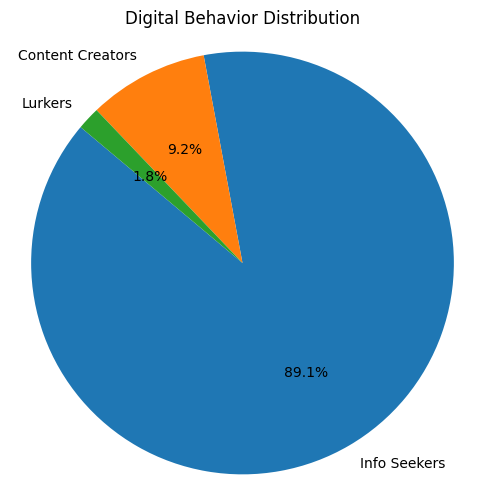

In [35]:
behavior_counts = df['digital_behavior'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(behavior_counts, labels=behavior_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Digital Behavior Distribution')
plt.axis('equal')
plt.show()

In [36]:
personality_traits = {
    "Adventurous": "Someone who seeks excitement, tries new things, and loves exploring unknown places",
    "Cautious": "Someone who is careful, avoids risks, and prefers safe and predictable travel",
    "Planner": "Someone who organizes every detail of their trip in advance, with schedules and bookings ready",
    "Spontaneous": "Someone who makes travel decisions on the fly, with minimal planning and loves surprises"
}

personality_texts = list(personality_traits.values())
personality_labels = list(personality_traits.keys())

In [37]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
personality_embeddings = model.encode(personality_texts, convert_to_tensor=True)

In [38]:
def classify_personality(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, personality_embeddings)
    best_match_idx = cosine_scores.argmax()
    return personality_labels[best_match_idx]

In [39]:
df['personality'] = df['cleaned_text'].apply(classify_personality)

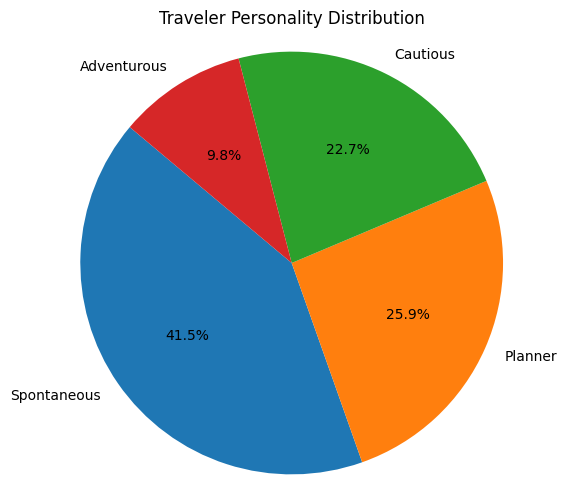

In [40]:
personality_counts = df['personality'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(personality_counts, labels=personality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Traveler Personality Distribution')
plt.axis('equal')
plt.show()

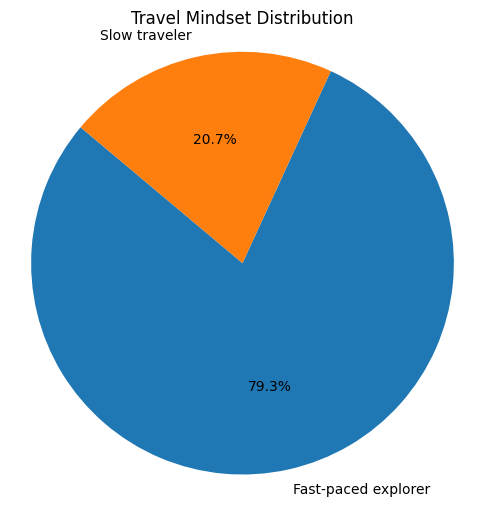

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load the MiniLM model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Define travel mindset categories and descriptions
travel_mindset = {
    "Slow traveler": "Enjoys staying longer in one place, immersing in local culture, moves at a relaxed pace.",
    "Fast-paced explorer": "Loves visiting many places in short time, constantly on the move, action-packed trips."
}

mindset_texts = list(travel_mindset.values())
mindset_labels = list(travel_mindset.keys())
mindset_embeddings = model.encode(mindset_texts, convert_to_tensor=True)

# Classification function
def classify_travel_mindset(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, mindset_embeddings)
    best_match_idx = cosine_scores.argmax()
    return mindset_labels[best_match_idx]

df['travel_mindset'] = df['cleaned_text'].apply(classify_travel_mindset)

# Plot distribution
mindset_counts = df['travel_mindset'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(mindset_counts, labels=mindset_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Mindset Distribution')
plt.axis('equal')
plt.show()

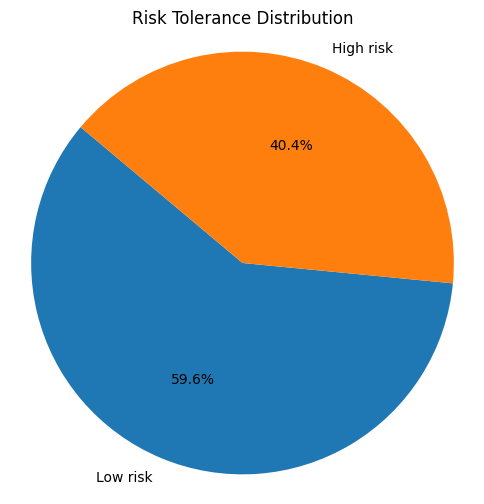

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Load the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Define risk tolerance categories
risk_tolerance = {
    "High risk": "Eager to try new cultures, foods, languages, and offbeat places. Loves new and unfamiliar experiences.",
    "Low risk": "Prefers safe zones, familiar food and places, avoids taking risks during travel."
}

# Prepare embeddings
risk_texts = list(risk_tolerance.values())
risk_labels = list(risk_tolerance.keys())
risk_embeddings = model.encode(risk_texts, convert_to_tensor=True)

# Classification function
def classify_risk_tolerance(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(text_embedding, risk_embeddings)
    best_match_idx = cosine_scores.argmax()
    return risk_labels[best_match_idx]

# Apply classification
df['risk_tolerance'] = df['cleaned_text'].apply(classify_risk_tolerance)

# Optional: Pie chart of risk tolerance distribution
risk_counts = df['risk_tolerance'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Risk Tolerance Distribution')
plt.axis('equal')
plt.show()

digital_behavior_final
Info Seeker        4146
Lurker             2233
Content Creator    1077
Name: count, dtype: int64


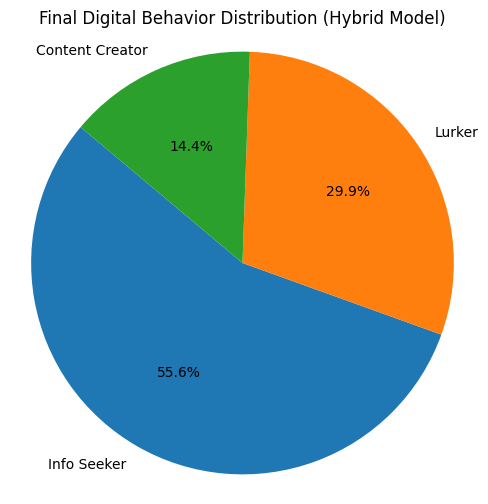

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# STEP 3: Load sentence transformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# STEP 4: Define semantic behavior profiles
digital_behavior_profiles = {
    "Content Creator": "I love posting travel stories, sharing pictures, and actively engaging with the community.",
    "Info Seeker": "I’m looking for travel tips or suggestions and often ask questions before traveling.",
    "Lurker": "I usually read others' posts but rarely post or comment myself."
}

# Encode profiles
behavior_labels = list(digital_behavior_profiles.keys())
profile_texts = list(digital_behavior_profiles.values())
profile_embeddings = model.encode(profile_texts, convert_to_tensor=True)

# STEP 5: Semantic classification
def classify_semantic_behavior(text):
    text_embedding = model.encode(text, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(text_embedding, profile_embeddings)
    return behavior_labels[scores.argmax()]

df['semantic_behavior'] = df['cleaned_text'].apply(classify_semantic_behavior)

# STEP 6: Compute activity-based signals
df['author_post_count'] = df['author'].map(df['author'].value_counts())
df['is_high_engagement'] = df['upvotes'] >= 50
df['is_discussion_starter'] = df['comments'] >= 5

# STEP 7: Hybrid behavior logic
def enhanced_behavior_class(row):
    semantic = row['semantic_behavior']
    posts = row['author_post_count']
    upvotes = row['upvotes']
    comments = row['comments']
    
    # Strong content creator behavior
    if posts >= 10 or upvotes >= 100:
        return 'Content Creator'
    # Engaged info seeker
    elif comments >= 5 and semantic == 'Info Seeker':
        return 'Info Seeker'
    # Passive behavior
    elif posts <= 1 and upvotes < 10:
        return 'Lurker'
    return semantic

df['digital_behavior_final'] = df.apply(enhanced_behavior_class, axis=1)

# STEP 8: Display counts
print(df['digital_behavior_final'].value_counts())

# STEP 9: Pie chart
behavior_counts = df['digital_behavior_final'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(behavior_counts, labels=behavior_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Final Digital Behavior Distribution (Hybrid Model)")
plt.axis('equal')
plt.show()